In [51]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import numpy as np

In [52]:
sub = 3

movement_data = pd.read_csv('../data/data_movements_' + str(sub) + '.csv')

In [53]:
#movement_data.loc[movement_data.state == "reach"]

<Axes: xlabel='x', ylabel='y'>

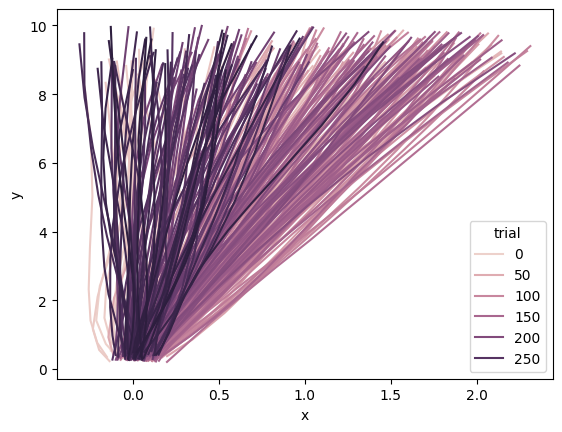

In [54]:
sns.lineplot(data = movement_data.loc[movement_data.state.isin(['reach'])], x = "x", y = "y", hue = "trial", sort = False)

In [55]:
#sns.lineplot(data = movement_data, x = "x", y = "y", hue = "trial", sort = False)

In [56]:
movement_data.head(200)

Unnamed: 0  trial        state  sample      time         x         y
0             0      0  search_ring       0  0.007505  0.624785  3.673841
1             1      0  search_ring       1  0.016552  0.624762  3.673838
2             2      0  search_ring       2  0.029583  0.624689  3.673830
3             3      0  search_ring       3  0.044547  0.624640  3.673831
4             4      0  search_ring       4  0.062524  0.624626  3.673821
..          ...    ...          ...     ...       ...       ...       ...
195         195      0  search_near     195  3.244491 -0.428046  0.774349
196         196      0  search_near     196  3.261453 -0.428154  0.736767
197         197      0  search_near     197  3.278470 -0.428228  0.699922
198         198      0  search_near     198  3.296483 -0.429049  0.662238
199         199      0  search_near     199  3.311496 -0.430470  0.622343

[200 rows x 7 columns]

In [57]:
#Checking that there are 300 reach trials: conclusion = yes
movement_data.loc[(movement_data.trial == 299) & (movement_data.state == 'reach')]

Unnamed: 0  trial  state  sample         time         x         y
74552          77    299  reach   75018  1250.357820  0.045783  0.381512
74553          78    299  reach   75019  1250.373437  0.065425  0.808714
74554          79    299  reach   75020  1250.390364  0.078435  1.398576
74555          80    299  reach   75021  1250.408394  0.084364  2.148695
74556          81    299  reach   75022  1250.423420  0.081066  3.044240
74557          82    299  reach   75023  1250.440355  0.065180  4.093442
74558          83    299  reach   75024  1250.457392  0.042487  5.301178
74559          84    299  reach   75025  1250.473366  0.033732  6.657878
74560          85    299  reach   75026  1250.490379  0.054107  8.110662
74561          86    299  reach   75027  1250.508357  0.108842  9.588726

In [58]:
# convert x, y coordinates for 'reach' to polar and add these to the data as columns 
# function inspired from https://stackoverflow.com/questions/20924085/python-conversion-between-coordinates 
def cart2pol(x, y):
    r = []
    theta = []
    for i in range(len(x)): 
        r.append(np.sqrt((x[i])**2 + (y[i])**2))
        theta.append(np.arctan2(y[i], x[i]))
    return(r, theta)

# create new subset of movement data only including reach state 
reach_data = movement_data.loc[movement_data.state == 'reach'].copy()

reach_x = reach_data.loc[(reach_data.state == 'reach'), 'x'].values
reach_y  = reach_data.loc[(reach_data.state == 'reach'), 'y'].values

r, theta = cart2pol(reach_x, reach_y)

In [59]:
# add r and theta to the reach dataset as columns 
reach_data['r'] = r
reach_data['theta'] = theta

In [60]:
reach_data

Unnamed: 0  trial  state  sample         time         x         y  \
279           279      0  reach     279     4.645016 -0.099556  0.539786   
280           280      0  reach     280     4.661605 -0.090844  1.175966   
281           281      0  reach     281     4.678593  0.013423  2.135244   
282           282      0  reach     282     4.696606  0.196161  3.406329   
283           283      0  reach     283     4.711616  0.457605  4.991364   
...           ...    ...    ...     ...          ...       ...       ...   
74557          82    299  reach   75023  1250.440355  0.065180  4.093442   
74558          83    299  reach   75024  1250.457392  0.042487  5.301178   
74559          84    299  reach   75025  1250.473366  0.033732  6.657878   
74560          85    299  reach   75026  1250.490379  0.054107  8.110662   
74561          86    299  reach   75027  1250.508357  0.108842  9.588726   

              r     theta  
279    0.548890  1.753183  
280    1.179469  1.647893  
281    2.135286  1.564510  
282    3.411972  1.513273  
283    5.012297  1.479373  
...         ...       ...  
74557  4.093961  1.554875  
74558  5.301349  1.562782  
74559  6.657964  1.565730  
74560  8.110843  1.564125  
74561  9.589344  1.559446  

[3160 rows x 9 columns]